<a href="https://colab.research.google.com/github/gt-cse-6040/bootcamp/blob/main/Module%200/Session%208/m0s3nb1_regex_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regular Expresions (Regex) - Intro

A *regular expression* is a specially formatted pattern, written as a string.

You can use regex to answer more complex questions than base python string methods can answer, like does this string match my pattern o is there a match for my pattern anywhere in this string. Regex can also modify a string or split it apart in various ways.

Regex HOWTO documentation: https://docs.python.org/3/howto/regex.html

In [ ]:
import re

### The findall() function returns a list containing all matches.

In [ ]:
# we want all matches of the string "ai"
txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)

['ai', 'ai']


### Metacharacters

Regex uses special characters called *metacharacters* to help us write patterns to match what we're interested in.

This is useful for when we're not trying to match a specific string. If instead we wanted "a" and whatever character came after it, regex could help us out.

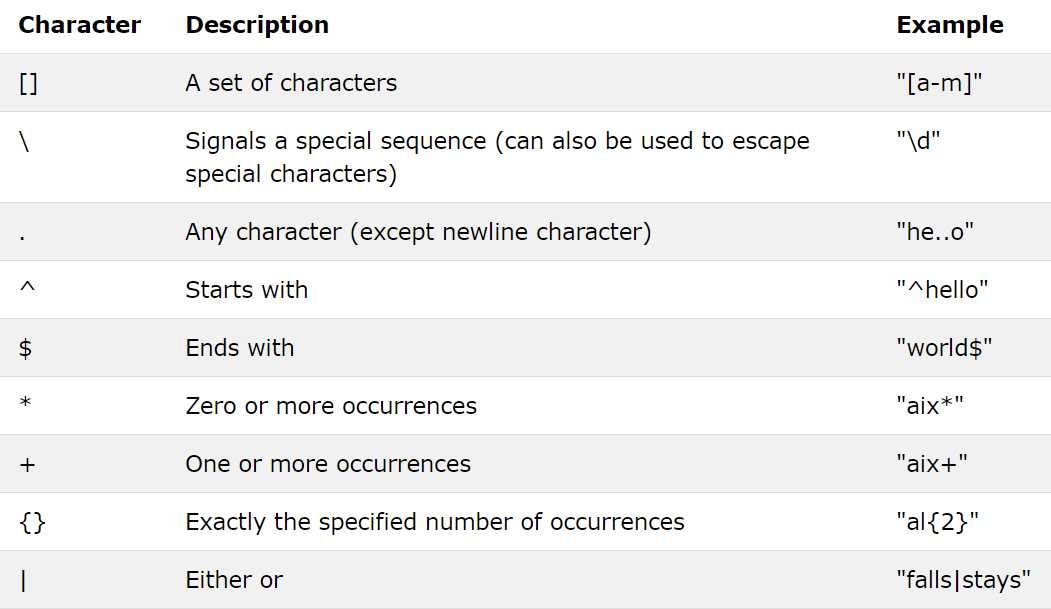

In [ ]:
# we want all matches of the string "a" and one single character after it
txt = "The rain in Spain"
x = re.findall("a.", txt)
print(x)

['ai', 'ai']


In [ ]:
txt = "The rain in Spain"
x = re.findall("a..", txt)
print(x)

['ain', 'ain']


### The search() function searches the string for a match, and returns a Match object if there is a match.


In [ ]:
txt = "The rain in Spain"
x = re.search("S", txt)
print(x)
print("The match is located in position:", x.start())

<re.Match object; span=(12, 13), match='S'>
The match is located in position: 12


In [ ]:
#Check if the string contains either "falls" or "stays":
txt = "The rain in Spain falls mainly in the plain!"
x = re.findall("falls|stays", txt)
print(x)

if x:
  print("Yes, there is at least one match!")
else:
  print("No match")

['falls']
Yes, there is at least one match!


### Special Characters

If we want to match our characters that already have a meaning, like |, we have to "escape" them.

In [ ]:
# Finding a match for the char '|'
txt = "is there | in this line"
x = re.findall("|", txt)
print(x)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


Just searching for | doesn't work

We use backslash to remove the special meaning of our metacharacters. This is called "escaping"

In [ ]:
# Finding a match for the char '|'
txt = "is there | in this line"
x = re.findall("\|", txt)
print(x)

['|']


### Character Class

Square brackets, [ ] , are used to specify a character class.

Characters can be listed individually, or a range of characters can be indicated by giving two characters and separating them by a '-'. For example, [abc] will match any of the characters a, b, or c; this is the same as [a-c]

In [ ]:
txt = 'abcdef'
x = re.findall('[a-c]', txt)
print(x)

['a', 'b', 'c']


You can complement the set within a character class using ^. It will match any character except what comes after the ^.

In [ ]:
txt = 'abcdef'
x = re.findall('[^a-c]', txt)
print(x)

['d', 'e', 'f']


### re.compile()

Regular expressions are compiled into pattern objects, which have methods for various operations such as searching for pattern matches or performing string substitutions.

.groups() -This method returns a tuple containing all the subgroups of the match, from 1 up to however many groups are in the pattern

In [ ]:
re_names2 = re.compile(r'''^              # Beginning of string
                           ([a-zA-Z]+)    # First name
                           \s+            # At least one space
                           ([a-zA-Z]+\s)? # Optional middle name
                           ([a-zA-Z]+)    # Last name
                           $              # End of string
                        ''',
                        re.VERBOSE)
print(re_names2.match("Brad Haddin").groups())



('Brad', None, 'Haddin')


Named groups

In [ ]:
re_names3 = re.compile(r'''^
                           (?P<first>[a-zA-Z]+)
                           \s
                           (?P<middle>[a-zA-Z]+\s)?
                           \s*
                           (?P<last>[a-zA-Z]+)
                           $
                        ''',
                        re.VERBOSE)
print(re_names3.match('Brad Haddin').group('first'))
print(re_names3.match('Brad J Haddin').group('middle'))
print(re_names3.match('Brad J Haddin').group('last'))

Brad
J 
Haddin


### re.split()-The split() function returns a list where the string has been split at each match:

In [ ]:
#Split the string at every white-space character:
import re
txt = "The rain in Spain"
x = re.split("\s", txt)
print(x)


['The', 'rain', 'in', 'Spain']


### re.sub()-The sub() function replaces the matches with the text of your choice:

In [ ]:
txt = "The rain in Spain"
x = re.sub("\s", "9", txt)
print(x)

The9rain9in9Spain


### Special Sequences

The most important metacharacter is the backslash. The backslash followed by certain characters create special sequences, like \s.

| Pattern | Description                                                             |
|---------|-------------------------------------------------------------------------|
| \d      | Matches any decimal digit; this is equivalent to the class [0-9]        |
| \D      | Matches any non-digit character; this is equivalent to the class [^0-9] |
| \s      | Matches any whitespace character (spaces, tabs, newlines, etc)          |
| \w      | Matches any alphanumeric character                                      |
| \W      | Matches any non-alphanumeric character                                  |

In [ ]:
# match whitespace
txt = "The rain in Spain"
x = re.search("\s", txt)
print("The first white-space character is located in position:", x.start())

The first white-space character is located in position: 3


### re.finditer()-Find all substrings where the RE matches, and returns them as an iterator:

In [ ]:
# Metacharacter classes
txt = 'The quick brown fox jumps over the lazy dog'
vowels = '[aeiou]'

print(f"Scanning '{txt}' for vowels, '{vowels}':")
for match_vowel in re.finditer(vowels, txt):
    print(match_vowel)

Scanning 'The quick brown fox jumps over the lazy dog' for vowels, '[aeiou]':
<re.Match object; span=(2, 3), match='e'>
<re.Match object; span=(5, 6), match='u'>
<re.Match object; span=(6, 7), match='i'>
<re.Match object; span=(12, 13), match='o'>
<re.Match object; span=(17, 18), match='o'>
<re.Match object; span=(21, 22), match='u'>
<re.Match object; span=(26, 27), match='o'>
<re.Match object; span=(28, 29), match='e'>
<re.Match object; span=(33, 34), match='e'>
<re.Match object; span=(36, 37), match='a'>
<re.Match object; span=(41, 42), match='o'>


A regular expression debugger. Regular expressions can be tough to write and debug, but thankfully, there are several online tools to help! See, [regex101](https://regex101.com) These all allow you to supply some sample input text and test what your pattern does in real time.